# Seaborn

### Distribution Plots

#### A distribution plot shows a distribution of a univariate (one variable) set of observations. It shows a histogram and a kernel density estimation (KDE), which is essentially the sum of normal distributions around a rug plot.

In [2]:
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
# Seaborn comes with some built-in data sets you can directly load
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


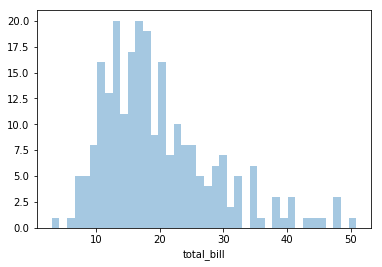

In [5]:
# Method for distribution plots
# Get rid of the kernel density estimation with kde=False
# Each bar represents a bin
# More bins can show more definition (depending on dataset)
sns.distplot(tips['total_bill'], kde=False, bins=40)

#### Jointplots allow you to match up to distplots for bivariate data. You can essentially combine two distribution plots.

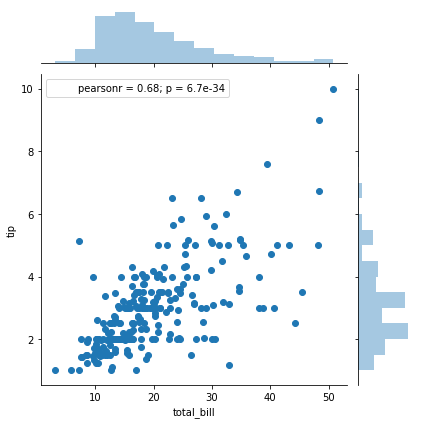

In [6]:
# Use kind= to set the kind of plot (scatter plot by default)
sns.jointplot(x='total_bill', y='tip', data=tips, kind='scatter')

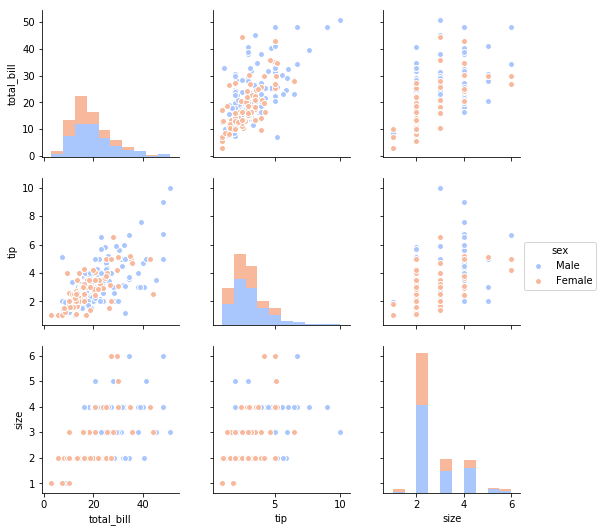

In [7]:
# Pairplot plots pairwise relationships over a dataframe
# Great way to quickly visualize your data
# Can add a hue argument by including the name of a categorical argument (non-numerical data)
# palette allows you to change the colors
sns.pairplot(tips, hue='sex', palette='coolwarm')

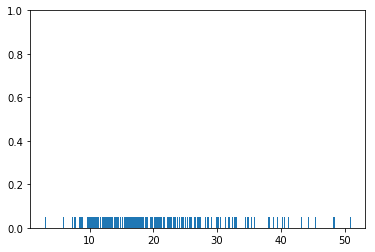

In [8]:
# Rug plots draws a dash mark for every point on the univariate (single variable) distribution
# Relates to histograms by the number of dashes between two numerical observations
# So, according to the histogram, there should be around 46 dashes between 10 and 11 (just an estimation)
sns.rugplot(tips['total_bill'])

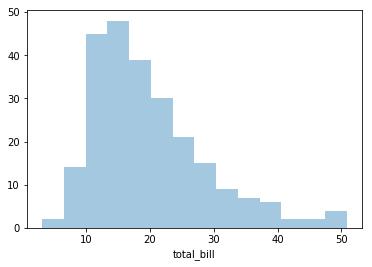

In [9]:
sns.distplot(tips['total_bill'], kde=False)

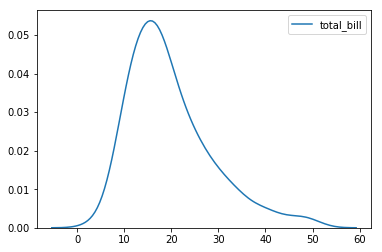

In [10]:
sns.kdeplot(tips['total_bill'])

### Categorical Plots

In [11]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [12]:
import numpy as np

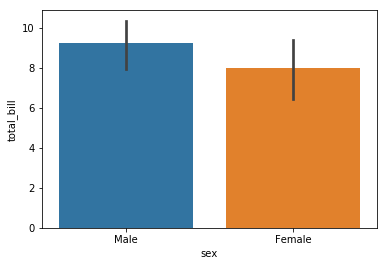

In [13]:
# Aggregate categorical data based on some function (mean by default)
# Think of it as a visualization of a "group by action"
# x = categorical column from data
# y = numeric column from data
# estimator = some function to estimate within each categorical bin (from documentation)
sns.barplot(x='sex', y='total_bill', data=tips, estimator=np.std)

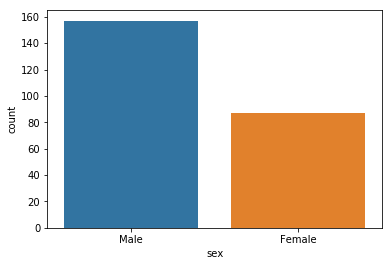

In [14]:
# Like a barplot, but count is chosen for y by default
sns.countplot(x='sex', data=tips)

### Box Plots and Violin Plots

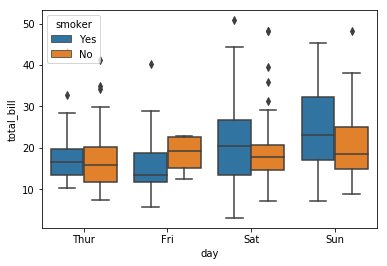

In [15]:
sns.boxplot(x='day', y='total_bill', data=tips, hue='smoker')

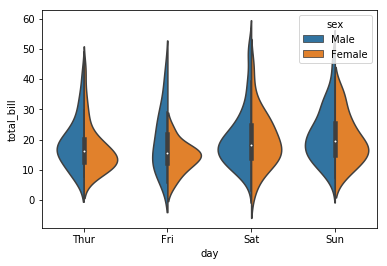

In [16]:
# split=True is useful when you havea hue because each half will of a violin plot will be a different category
sns.violinplot(x='day', y='total_bill', data=tips, hue='sex', split=True)

### Strip Plot

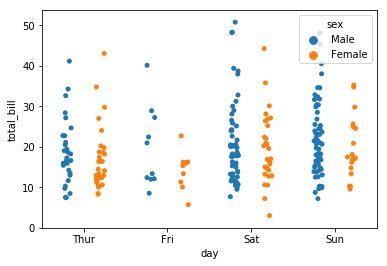

In [17]:
# jitter=True will separate the points horizontally so it's easier to see how they differ vertically
# Note: 'split' has been renamed to 'dodge' for strip plots
sns.stripplot(x='day', y='total_bill', data=tips, jitter=True, hue='sex', dodge=True)

### Swarm Plot


#### Basically combines a strip plot and a violin. Points are adjusted so they don't overlap.

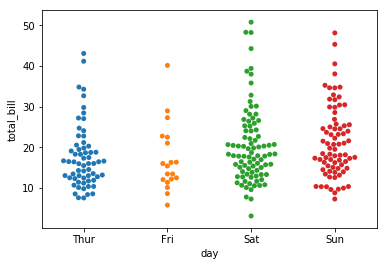

In [18]:
# Not advised for very large data sets because they don't scale well with large numbers!

sns.swarmplot(x='day', y='total_bill', data=tips)

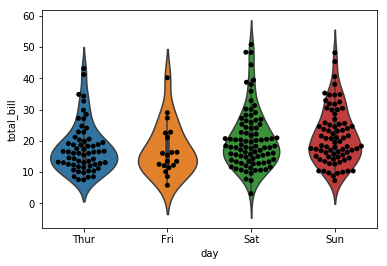

In [19]:
# Can combine a swarm plot and a violin plot

sns.violinplot(x='day', y='total_bill', data=tips)
sns.swarmplot(x='day', y='total_bill', data=tips, color='black')

 ### Factor Plot

#### Most general form of all these plots.

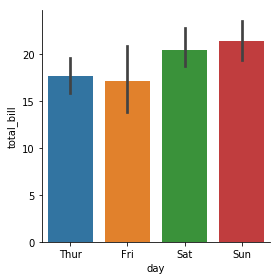

In [20]:
# The "kind" argument is used to describe the factor plot

sns.factorplot(x='day', y='total_bill', data=tips, kind='bar')

### Matrix Plots and Heat Maps

In [21]:
flights = sns.load_dataset('flights')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [22]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


#### In order for a heatmap to work properly, the data needs to be in a matrix form. Therefore, the index name and the column name must match up so the cell value indicated something relevant to the row and column name. In the data above, the row numbers are just indexes, so this is not a matrix form. To be in matrix form, we need variables in both the columns and the rows. Pivot tables and correlation data are methods for putting data into matrix form.

#### Correlation Data Method

In [23]:
tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


In [24]:
tc = tips.corr()

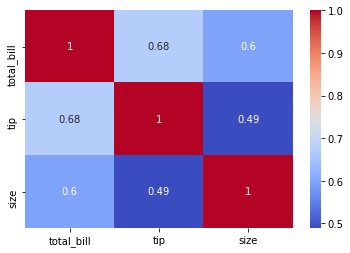

In [25]:
# Colors in values based on a gradient scale
# annot=True shows the numbers
# cmap will change the gradient colors

sns.heatmap(tc, annot=True, cmap='coolwarm')

In [26]:
# Want flights in matrix form
flights.pivot_table(index='month', columns='year', values='passengers')

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


In [27]:
fp = flights.pivot_table(index='month', columns='year', values='passengers')

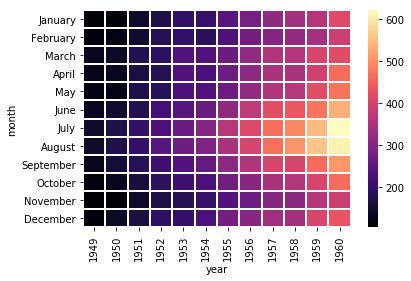

In [28]:
# linecolor and linwidth can enhance readability
sns.heatmap(fp, cmap='magma', linecolor='white', linewidth=1)

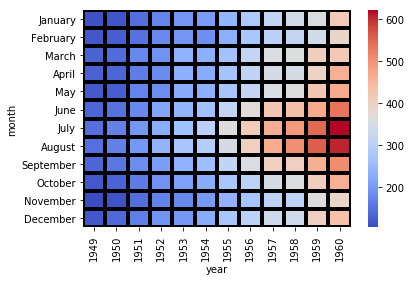

In [29]:
# linecolor and linwidth can enhance readability
sns.heatmap(fp, cmap='coolwarm', linecolor='black', linewidth=3)

#### Cluster Map

#### Uses hierarchical clustering to produce a clustered version of the heatmap. It tries to cluster rows and columns together based on their similiarity. Note that the months and years found in the map below are out of order. This is because similar rows/columns are trying to be grouped together.

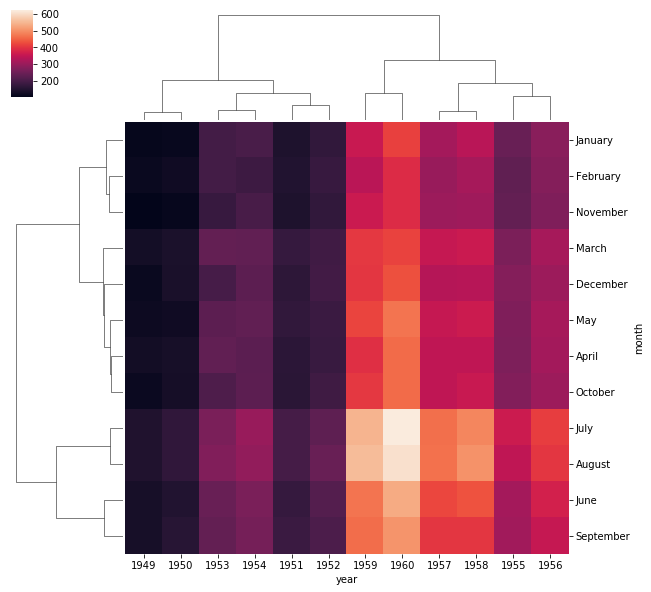

In [30]:
sns.clustermap(fp)

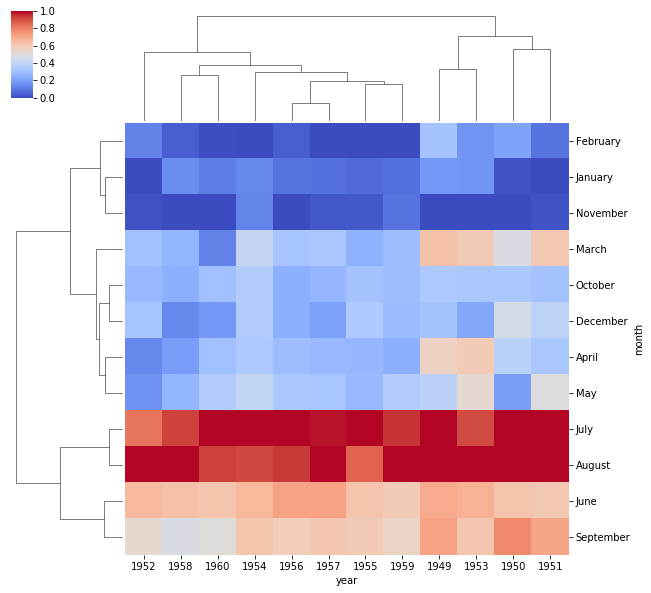

In [31]:
# standard_scale=1 will normalize the data
sns.clustermap(fp, cmap='coolwarm', standard_scale=1)

### Regression Plots

#### lmplot() allows you to display liner models with Seaborn.

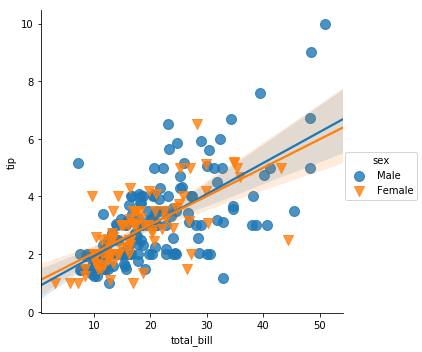

In [32]:
# markers will help separate different data points when a hue is specified
# Note: lmplot() calls matplotlib in the background
# Use scatter_kws with a dictionary to change the size of the markers
sns.lmplot(x='total_bill', y='tip', data=tips, hue='sex', markers=['o', 'v'], scatter_kws={'s':100})

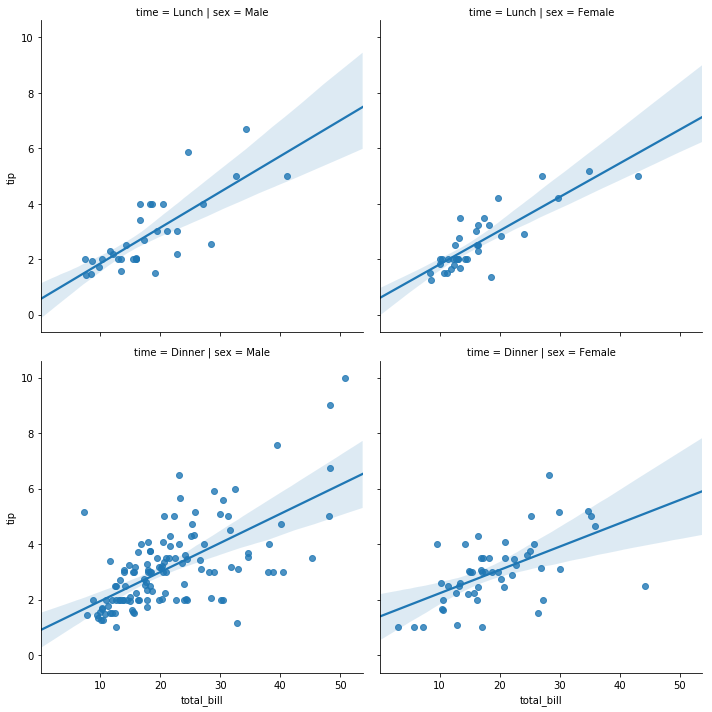

In [33]:
# Can use a grid instead of separating by hue
sns.lmplot(x='total_bill', y='tip', data=tips, col='sex', row='time')

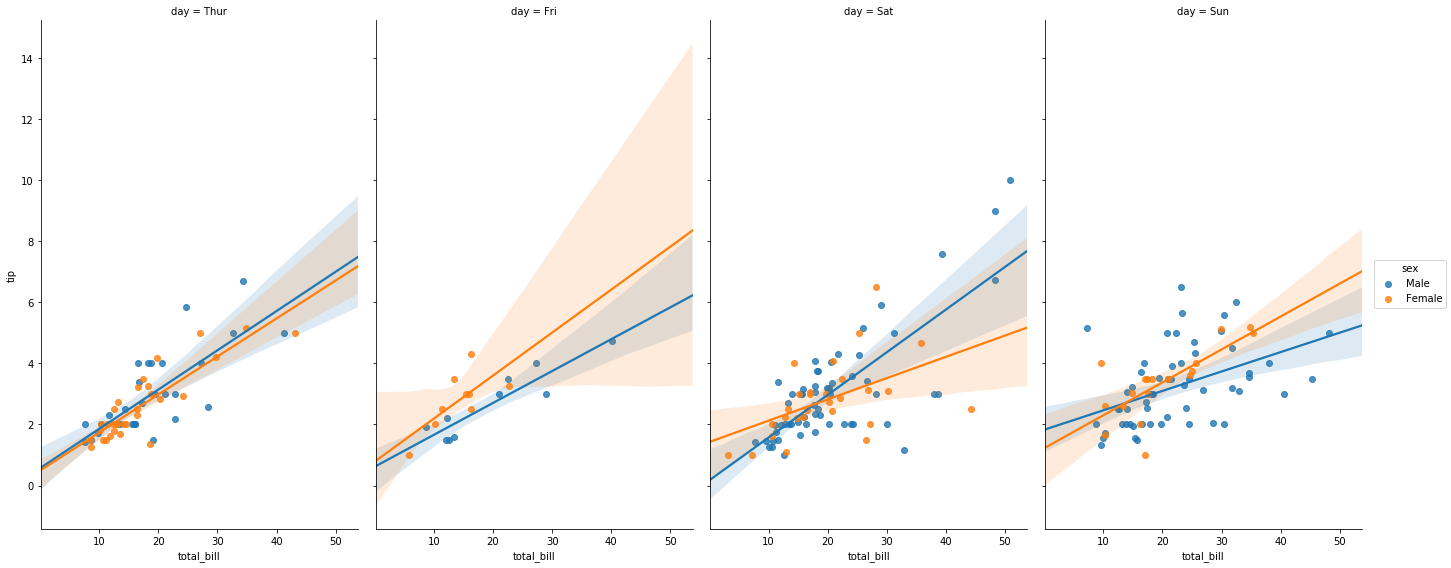

In [34]:
# Use size and aspect parameters to change the size and aspect ratio
# Aspect is the ratio between the height and the width of each separate grid (high number means wide grid)
# Later in these notes you will see how to change font size
sns.lmplot(x='total_bill', y='tip', data=tips, col='day', hue='sex', aspect=0.6, size=8)

### Grids

In [35]:
import matplotlib.pyplot as plt
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [36]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

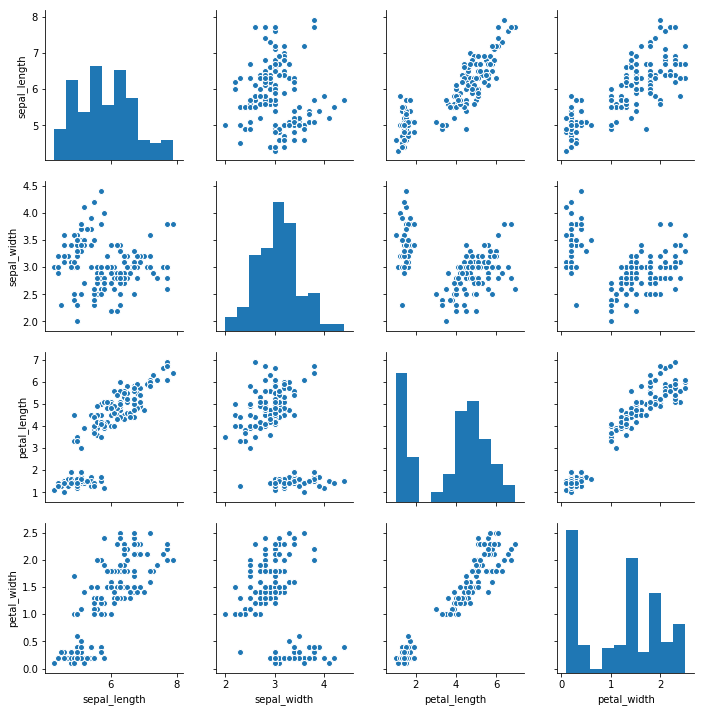

In [37]:
sns.pairplot(iris)

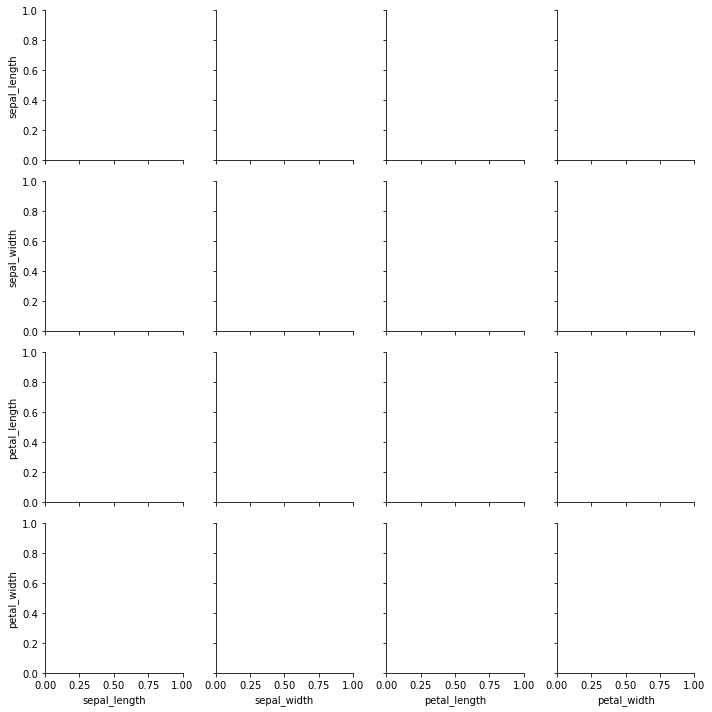

In [38]:
# Can customize a pair plot using PairGrid()
# This will just show and empty pair plot
sns.PairGrid(iris)

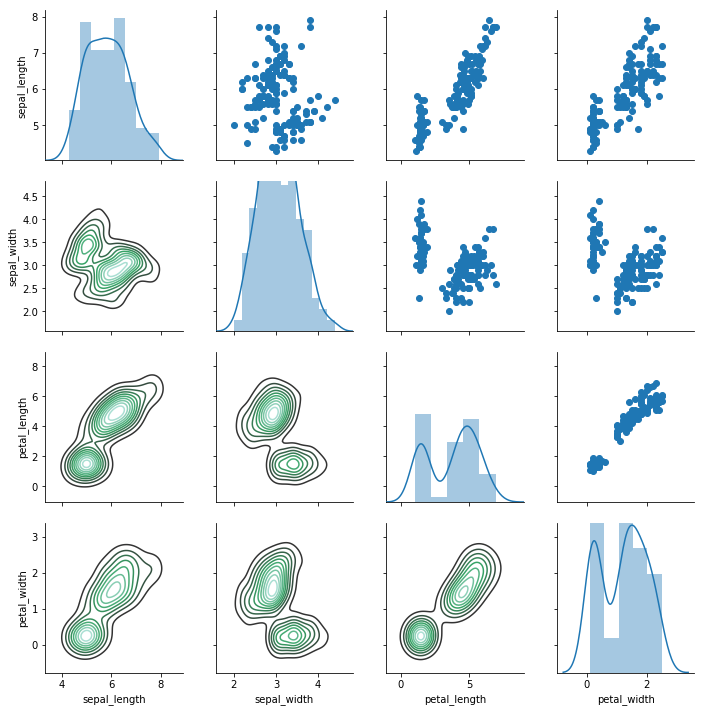

In [40]:
# Set sns.PairGrid() to a variable and map the plot types
g = sns.PairGrid(iris)
g.map_diag(sns.distplot)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

In [41]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


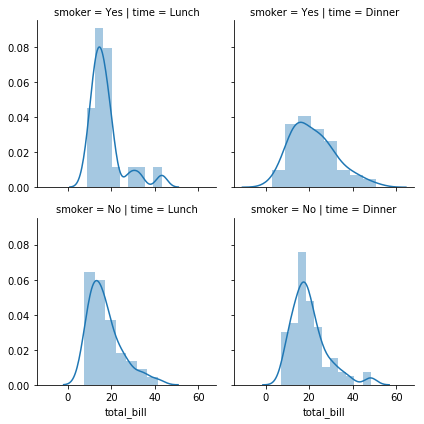

In [44]:
# First, you need to specify the rows and columns indicating the variable you want to separate by
# Then, you use map() to specify the data you want to display
g = sns.FacetGrid(data=tips, col='time', row='smoker')
g.map(sns.distplot, 'total_bill')

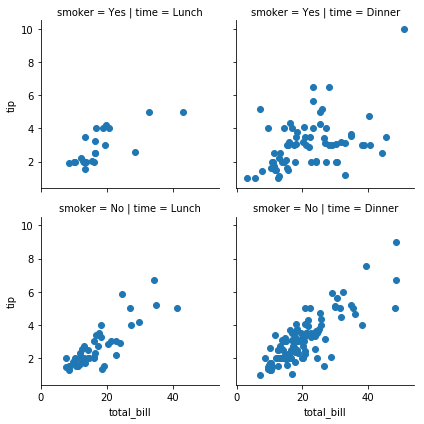

In [50]:
# Different map settings may need different amount of parameters
# Here, using sns.scatter will cause an error. We need more data for the plot to work (added 'tip')
g = sns.FacetGrid(data=tips, col='time', row='smoker')
g.map(plt.scatter, 'total_bill', 'tip')

### Style and Color

In [54]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


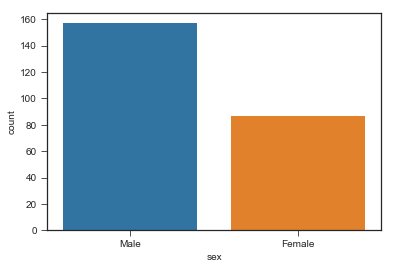

In [63]:
# Notice the ticks on the left side of the graph
sns.set_style('ticks')
sns.countplot(x='sex', data=tips)

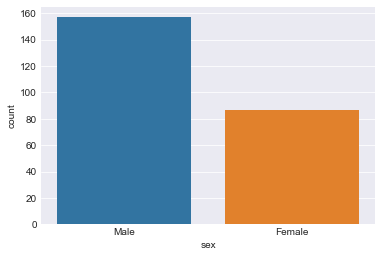

In [59]:
sns.set_style('darkgrid')
sns.countplot(x='sex', data=tips)

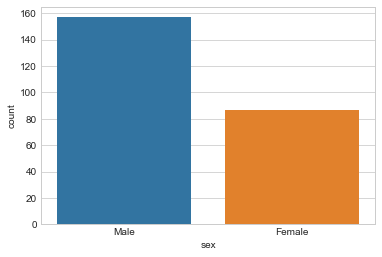

In [60]:
sns.set_style('whitegrid')
sns.countplot(x='sex', data=tips)

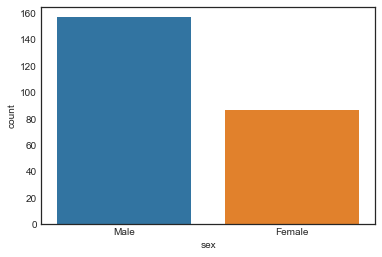

In [61]:
sns.set_style('white') # Default
sns.countplot(x='sex', data=tips)

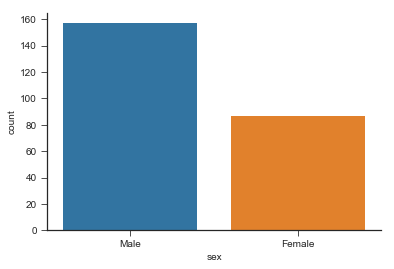

In [68]:
# despine() will remove the top and right borders by default (can specify otherwise)
sns.set_style('ticks')
sns.countplot(x='sex', data=tips)
sns.despine()

### Size and Aspect

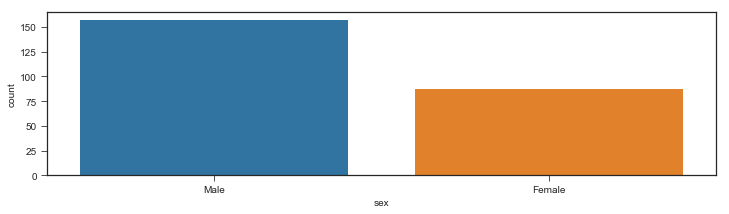

In [70]:
# Pass in size and aspect parameters to change either one
plt.figure(figsize=(12,3))
sns.countplot(x='sex', data=tips)

### Scale and Context

#### Can use set_context() to override default parameters and change font scales, depending on what you're creating the figure for. For instance, you can change the context parameter for when you're using the plot for a poster.

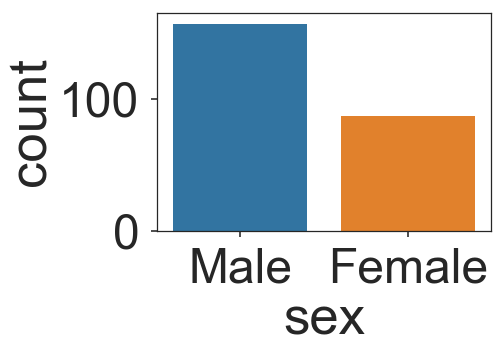

In [77]:
sns.set_context('poster', font_scale=3)
sns.countplot(x='sex', data=tips)

### Palettes and Colors

#### Google 'matplotlib colormap' to find various color schemes.
#### Direct link to documentation: https://matplotlib.org/examples/color/colormaps_reference.html

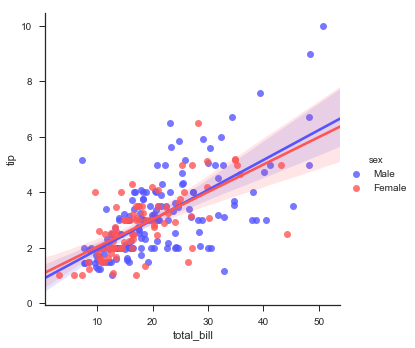

In [85]:
sns.set_context('notebook')
sns.lmplot(x='total_bill', y='tip', data=tips, hue='sex', palette='seismic')